In [1]:
import pandas as pd

In [124]:
flights = pd.read_csv('../../../large_files/flights.csv')
f_samp = flights.sample(100000)
f_samp.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
289837,2019-06-28,DL,DL,DL,2991,DL,N3766,2991,10721,BOS,...,2496.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582352,2018-03-11,WN,WN,WN,3408,WN,N8698B,3408,14057,PDX,...,1708.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579890,2018-03-11,UA,UA,UA,225,UA,N14120,225,13930,ORD,...,588.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735188,2018-03-18,AA,AA_CODESHARE,AA,5428,OH,N537EA,5428,11057,CLT,...,118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399419,2018-03-03,UA,UA_CODESHARE,UA,4408,EV,N16987,4408,12266,IAH,...,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
f_samp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 289837 to 370707
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              100000 non-null  object 
 1   mkt_unique_carrier   100000 non-null  object 
 2   branded_code_share   100000 non-null  object 
 3   mkt_carrier          100000 non-null  object 
 4   mkt_carrier_fl_num   100000 non-null  int64  
 5   op_unique_carrier    100000 non-null  object 
 6   tail_num             99421 non-null   object 
 7   op_carrier_fl_num    100000 non-null  int64  
 8   origin_airport_id    100000 non-null  int64  
 9   origin               100000 non-null  object 
 10  origin_city_name     100000 non-null  object 
 11  dest_airport_id      100000 non-null  int64  
 12  dest                 100000 non-null  object 
 13  dest_city_name       100000 non-null  object 
 14  crs_dep_time         100000 non-null  int64  
 15  dep_time    

In [9]:
import seaborn as sns
from scipy import stats

## Arrival delays

In [126]:
# get outliers from z-score
delays_arr = f_samp['arr_delay'].dropna()
z_arr = stats.zscore(delays_arr)
z_arr

array([-0.58861617,  0.15267012, -0.36211202, ...,  0.00853112,
       -0.32092945,  0.68804355])

Mean delay in minutes: 2.201428886161206
Variance of delays in minutes: 810.368456801309
p-value result for normality of distribution of delays: 0.0


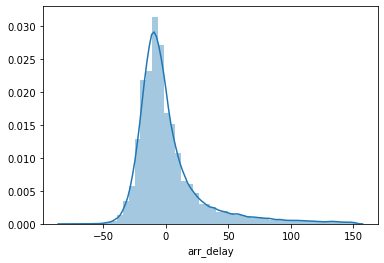

In [127]:
# Plot distribution by removing z-score>3
sns.distplot(delays_arr.loc[(abs(z_arr)<3)])
print(f'Mean delay in minutes: {delays_arr.loc[(abs(z_arr)<3)].mean()}')
print(f'Variance of delays in minutes: {delays_arr.loc[(abs(z_arr)<3)].var()}')
res, p = stats.shapiro(delays_arr.loc[(abs(z_arr)<3)])
print(f'p-value result for normality of distribution of delays: {p}')

In [128]:
# Null-hypothesis -> pop_mean = 0
res_t, p_t = stats.ttest_1samp(delays_arr.loc[(abs(z_arr)<3)],popmean=0)
print(f'p-value for 1-way t-test against population of 0 minutes: {p_t}')

p-value for 1-way t-test against population of 0 minutes: 1.2891645402142362e-125


In [30]:
from sklearn.neighbors import LocalOutlierFactor

In [129]:
clf = LocalOutlierFactor() # density-based approach
delay_no_outs_arr = delays_arr[(clf.fit_predict(delays_arr.to_numpy().reshape(-1,1)) != -1)] # value of -1 are outliers

Mean delay in minutes: 6.243533325069212
Variance of delays in minutes: 2171.9100410300744
p-value result for normality of distribution of delays: 0.0


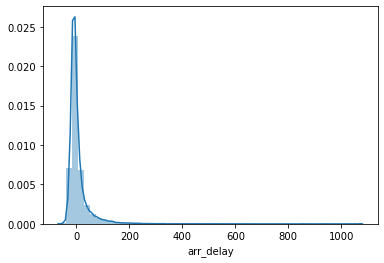

In [130]:
sns.distplot(delay_no_outs_arr)
print(f'Mean delay in minutes: {delay_no_outs_arr.mean()}')
print(f'Variance of delays in minutes: {delay_no_outs_arr.var()}')
res, p = stats.shapiro(delay_no_outs_arr)
print(f'p-value result for normality of distribution of delays: {p}')

In [131]:
res_t, p_t = stats.ttest_1samp(delay_no_outs_arr,popmean=0)
print(f'p-value for 1-way t-test against population of 0 minutes: {p_t}')

p-value for 1-way t-test against population of 0 minutes: 0.0


## Departure delays

In [132]:
# get outliers from z-score
delays_dep = f_samp['dep_delay'].dropna()
z_dep = stats.zscore(delays_dep)
z_dep

array([-0.35202594, -0.05222648, -0.26636895, ...,  0.05484476,
       -0.33061169,  1.06131438])

Mean delay in minutes: 7.0510245708726895
Variance of delays in minutes: 634.5280868421978
p-value result for normality of distribution of delays: 0.0


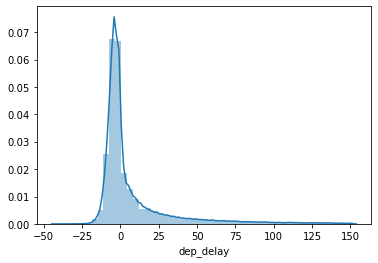

In [133]:
# Plot distribution by removing z-score>3
sns.distplot(delays_dep.loc[(abs(z_dep)<3)])
print(f'Mean delay in minutes: {delays_dep.loc[(abs(z_dep)<3)].mean()}')
print(f'Variance of delays in minutes: {delays_dep.loc[(abs(z_dep)<3)].var()}')
res, p = stats.shapiro(delays_dep.loc[(abs(z_dep)<3)])
print(f'p-value result for normality of distribution of delays: {p}')

In [134]:
# Null-hypothesis -> pop_mean = 0
res_t, p_t = stats.ttest_1samp(delays_dep.loc[(abs(z_dep)<3)],popmean=0)
print(f'p-value for 1-way t-test against population of 0 minutes: {p_t}')

p-value for 1-way t-test against population of 0 minutes: 0.0


In [135]:
clf = LocalOutlierFactor() # density-based approach
delay_no_outs_dep = delays_dep[(clf.fit_predict(delays_dep.to_numpy().reshape(-1,1)) != -1)] # value of -1 are outliers

Mean delay in minutes: 11.10090930622921
Variance of delays in minutes: 1998.2742383550824
p-value result for normality of distribution of delays: 0.0


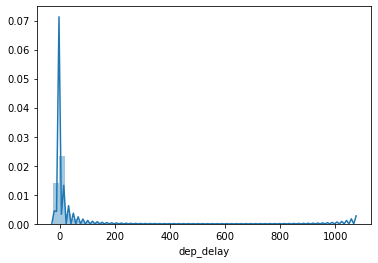

In [136]:
sns.distplot(delay_no_outs_dep)
print(f'Mean delay in minutes: {delay_no_outs_dep.mean()}')
print(f'Variance of delays in minutes: {delay_no_outs_dep.var()}')
res, p = stats.shapiro(delay_no_outs_dep)
print(f'p-value result for normality of distribution of delays: {p}')

In [137]:
res_t, p_t = stats.ttest_1samp(delay_no_outs_dep,popmean=0)
print(f'p-value for 1-way t-test against population of 0 minutes: {p_t}')

p-value for 1-way t-test against population of 0 minutes: 0.0


In [64]:
import datetime

In [138]:
# some departure delay can be caught up in-flight
print(f_samp['dep_delay'].groupby(pd.to_datetime(f_samp['fl_date'],format='%Y-%m-%d').apply(lambda x: x.month)).mean())
print(f_samp['dep_delay'].groupby(pd.to_datetime(f_samp['fl_date'],format='%Y-%m-%d').apply(lambda x: x.month)).median())
print(f_samp['arr_delay'].groupby(pd.to_datetime(f_samp['fl_date'],format='%Y-%m-%d').apply(lambda x: x.month)).mean())
print(f_samp['arr_delay'].groupby(pd.to_datetime(f_samp['fl_date'],format='%Y-%m-%d').apply(lambda x: x.month)).median())

fl_date
3     7.844458
6    18.008604
Name: dep_delay, dtype: float64
fl_date
3   -2.0
6   -1.0
Name: dep_delay, dtype: float64
fl_date
3     2.333636
6    14.386102
Name: arr_delay, dtype: float64
fl_date
3   -6.0
6   -3.0
Name: arr_delay, dtype: float64


In [139]:
f_samp.groupby(pd.to_datetime(f_samp['fl_date'],format='%Y-%m-%d').apply(lambda x: x.month)).size()

fl_date
3    64809
6    35191
dtype: int64

# Passenger data

In [140]:
passengers = pd.read_csv('../../../large_files/passengers.csv')
p_samp = passengers.sample(100000)
p_samp.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
41798,0.0,2.0,70000.0,310.0,0.0,0.0,0.0,308.0,200.0,113.0,...,US,United States,6,655,1,2019,2,1,L,DU
499760,0.0,51.0,5696871.0,15181.0,12719.0,1517032.0,0.0,3635.0,0.0,0.0,...,US,United States,6,637,1,2018,12,8,F,IF
804357,0.0,48.0,364800.0,1448.0,304.0,0.0,0.0,150.0,2714.0,1857.0,...,US,United States,4,456,1,2017,7,1,F,DU
424990,64.0,59.0,896800.0,4484.0,3904.0,0.0,0.0,1385.0,12347.0,10148.0,...,US,United States,6,673,1,2019,1,3,F,IU
32627,0.0,1.0,66960.0,149.0,30.0,0.0,0.0,502.0,82.0,72.0,...,US,United States,6,619,1,2019,12,2,L,DU


In [142]:
p_samp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 41798 to 686407
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   departures_scheduled   100000 non-null  float64
 1   departures_performed   100000 non-null  float64
 2   payload                100000 non-null  float64
 3   seats                  100000 non-null  float64
 4   passengers             100000 non-null  float64
 5   freight                100000 non-null  float64
 6   mail                   100000 non-null  float64
 7   distance               100000 non-null  float64
 8   ramp_to_ramp           100000 non-null  float64
 9   air_time               100000 non-null  float64
 10  unique_carrier         100000 non-null  object 
 11  airline_id             100000 non-null  int64  
 12  unique_carrier_name    100000 non-null  object 
 13  region                 100000 non-null  object 
 14  carrier                100000 no

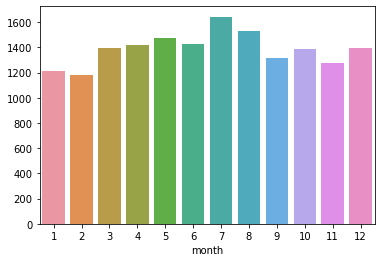

In [141]:
# distribution of passengers MEAN
sns.barplot((p_samp['passengers']).groupby(p_samp['month']).mean().index,(p_samp['passengers']).groupby(p_samp['month']).mean().values)

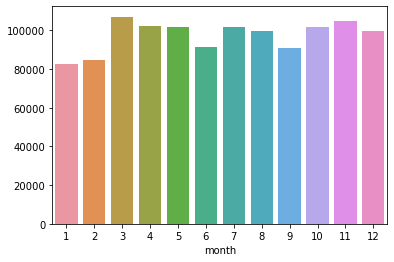

In [143]:
# distribution of freight MEAN
sns.barplot((p_samp['freight']).groupby(p_samp['month']).mean().index,(p_samp['freight']).groupby(p_samp['month']).mean().values)

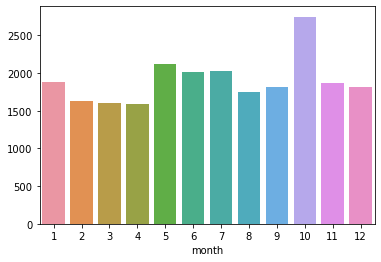

In [144]:
# distribution of mail MEAN
sns.barplot((p_samp['mail']).groupby(p_samp['month']).mean().index,(p_samp['mail']).groupby(p_samp['month']).mean().values)